##### 將指定的顏色變透明
這篇教學會介紹使用 OpenCV 讀取影像，將影像轉換成具有透明色版 ( alpha channel ) 的顏色模式後，將某些指定的顏色換成透明，\
做到在單色背景中去背的影像效果。

因為程式中的 OpenCV 會需要使用鏡頭或 GPU，所以請使用本機環境或使用 Anaconda Jupyter 進行實作，\
並安裝 OpenCV 函式庫 ( 參考：[OpenCV 函式庫](https://steam.oxxostudio.tw/category/python/ai/opencv.html) )。

##### 開啟圖片，轉換色彩 
使用 imread() 的 cv2.IMREAD_UNCHANGED 參數開啟圖片，可以開啟原本帶有透明色版 ( alpha channel ) 的圖片，下方的例子，\
img1 是一張帶有透明色版的 png，img2 是一張沒有透明色版的 jpg，開啟圖片後使用 img.shape 就能看到第三個數值有所不同。

* 參考：[色彩模式數字對照表](https://steam.oxxostudio.tw/category/python/ai/opencv-read-image.html#a4)、[shape 取得長寬與色版數量](https://steam.oxxostudio.tw/category/python/ai/opencv-information.html#a1)

In [1]:
import cv2
img1 = cv2.imread('meme_1.jpg', cv2.IMREAD_UNCHANGED)
# img2 = cv2.imread('test.png', cv2.IMREAD_UNCHANGED)
print(img1.shape)    # (400, 300, 3)  JPG 只有三個色版 BGR
# print(img2.shape)    # (400, 300, 4)  PNG 四個色版 GRA

(236, 236, 3)


除了直接開啟帶有透明色版的圖片，也可使用 cv2.cvtColor 的方法，將沒有包含透明色版的圖片，轉換為帶有透明色版的 BGRA 色彩模式。

* 參考：[影像的色彩轉換](https://steam.oxxostudio.tw/category/python/ai/opencv-cvtcolor.html)

In [3]:
import cv2
img = cv2.imread('meme_1.jpg', cv2.IMREAD_UNCHANGED) # 讀取圖片
img = cv2.cvtColor(img, cv2.COLOR_BGR2BGRA)  # 轉換成 BGRA 色彩模式
print(img.shape)                             # (400, 300, 4)  第三個數值變成 4

(236, 236, 4)


True

##### 將指定的顏色變成透明 
影像中透明色版區間為 0～255，0 表示全透明，255 表示不透明，因此只要將指定顏色的透明色版設定為 0，就能讓該顏色變成透明，\
下方的程式碼執行後，會將 opencv logo 圖檔中的白色去除變成透明，最後儲存為背景透明的 png。

* 範例圖檔：[OpenCV logo](https://steam.oxxostudio.tw/download/python/opencv-transparent-logo.jpg)

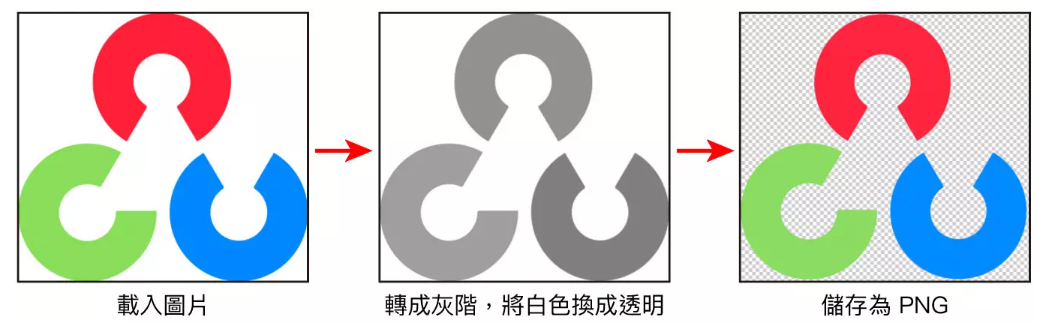

In [7]:
import cv2
img = cv2.imread('Dog.jpg', cv2.IMREAD_UNCHANGED)   # 開啟圖片
img = cv2.cvtColor(img, cv2.COLOR_BGR2BGRA)         # 因為是 jpg，要轉換顏色為 BGRA
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)        # 新增 gray 變數為轉換成灰階的圖片

h = img.shape[0]     # 取得圖片高度
w = img.shape[1]     # 取得圖片寬度

# 依序取出圖片中每個像素
for x in range(w):
    for y in range(h):
        if gray[y, x]>50:
            img[y, x, 3] = 255 - gray[y, x]
            # 如果該像素的灰階度大於 200，調整該像素的透明度
            # 使用 255 - gray[y, x] 可以將一些邊緣的像素變成半透明，避免太過鋸齒的邊緣

cv2.imwrite('oxxostudio6.png', img)    # 存檔儲存為 png
cv2.waitKey(0)                        # 按下任意鍵停止
cv2.destroyAllWindows()

使用同樣的方法，也可以將某個顏色置換為另外一種顏色，下方的程式碼會將白色部分置換為黃色。

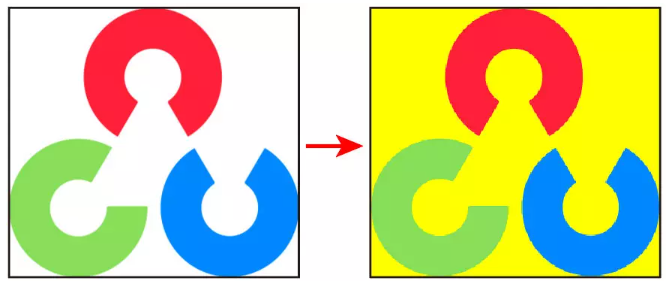

In [9]:
import cv2
img = cv2.imread('meme_2.png', cv2.IMREAD_UNCHANGED)
img = cv2.cvtColor(img, cv2.COLOR_BGR2BGRA)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

h = img.shape[0]
w = img.shape[1]

for x in range(w):
    for y in range(h):
        if gray[y, x]>200:
            img[y, x] = [0,255,255,255]  # 換成黃色

cv2.imwrite('oxxostudio.png', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

這一行程式碼的作用是將圖片中某個像素的顏色設置為特定的值。具體來說：

- [`img[y, x]`](command:_github.copilot.openSymbolFromReferences?%5B%22img%5By%2C%20x%5D%22%2C%5B%7B%22uri%22%3A%7B%22%24mid%22%3A1%2C%22fsPath%22%3A%22d%3A%5C%5CLearning_Python%5C%5COpenCV%5C%5C32-%E5%B0%87%E6%8C%87%E5%AE%9A%E7%9A%84%E9%A1%8F%E8%89%B2%E8%AE%8A%E9%80%8F%E6%98%8E.ipynb%22%2C%22_sep%22%3A1%2C%22external%22%3A%22vscode-notebook-cell%3A%2Fd%253A%2FLearning_Python%2FOpenCV%2F32-%25E5%25B0%2587%25E6%258C%2587%25E5%25AE%259A%25E7%259A%2584%25E9%25A1%258F%25E8%2589%25B2%25E8%25AE%258A%25E9%2580%258F%25E6%2598%258E.ipynb%23X11sZmlsZQ%253D%253D%22%2C%22path%22%3A%22%2Fd%3A%2FLearning_Python%2FOpenCV%2F32-%E5%B0%87%E6%8C%87%E5%AE%9A%E7%9A%84%E9%A1%8F%E8%89%B2%E8%AE%8A%E9%80%8F%E6%98%8E.ipynb%22%2C%22scheme%22%3A%22vscode-notebook-cell%22%2C%22fragment%22%3A%22X11sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A11%2C%22character%22%3A12%7D%7D%5D%5D "Go to definition") 表示圖片中位於 `(x, y)` 位置的像素。
- `[0, 255, 255, 255]` 是一個包含四個元素的列表，分別代表該像素的藍色、綠色、紅色和透明度（alpha）通道的值。

在這個例子中：

- [`0`](command:_github.copilot.openSymbolFromReferences?%5B%220%22%2C%5B%7B%22uri%22%3A%7B%22%24mid%22%3A1%2C%22fsPath%22%3A%22d%3A%5C%5CLearning_Python%5C%5COpenCV%5C%5C32-%E5%B0%87%E6%8C%87%E5%AE%9A%E7%9A%84%E9%A1%8F%E8%89%B2%E8%AE%8A%E9%80%8F%E6%98%8E.ipynb%22%2C%22_sep%22%3A1%2C%22external%22%3A%22vscode-notebook-cell%3A%2Fd%253A%2FLearning_Python%2FOpenCV%2F32-%25E5%25B0%2587%25E6%258C%2587%25E5%25AE%259A%25E7%259A%2584%25E9%25A1%258F%25E8%2589%25B2%25E8%25AE%258A%25E9%2580%258F%25E6%2598%258E.ipynb%23X11sZmlsZQ%253D%253D%22%2C%22path%22%3A%22%2Fd%3A%2FLearning_Python%2FOpenCV%2F32-%E5%B0%87%E6%8C%87%E5%AE%9A%E7%9A%84%E9%A1%8F%E8%89%B2%E8%AE%8A%E9%80%8F%E6%98%8E.ipynb%22%2C%22scheme%22%3A%22vscode-notebook-cell%22%2C%22fragment%22%3A%22X11sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A11%2C%22character%22%3A25%7D%7D%5D%5D "Go to definition") 代表藍色通道的值。
- [`255`](command:_github.copilot.openSymbolFromReferences?%5B%22255%22%2C%5B%7B%22uri%22%3A%7B%22%24mid%22%3A1%2C%22fsPath%22%3A%22d%3A%5C%5CLearning_Python%5C%5COpenCV%5C%5C32-%E5%B0%87%E6%8C%87%E5%AE%9A%E7%9A%84%E9%A1%8F%E8%89%B2%E8%AE%8A%E9%80%8F%E6%98%8E.ipynb%22%2C%22_sep%22%3A1%2C%22external%22%3A%22vscode-notebook-cell%3A%2Fd%253A%2FLearning_Python%2FOpenCV%2F32-%25E5%25B0%2587%25E6%258C%2587%25E5%25AE%259A%25E7%259A%2584%25E9%25A1%258F%25E8%2589%25B2%25E8%25AE%258A%25E9%2580%258F%25E6%2598%258E.ipynb%23X11sZmlsZQ%253D%253D%22%2C%22path%22%3A%22%2Fd%3A%2FLearning_Python%2FOpenCV%2F32-%E5%B0%87%E6%8C%87%E5%AE%9A%E7%9A%84%E9%A1%8F%E8%89%B2%E8%AE%8A%E9%80%8F%E6%98%8E.ipynb%22%2C%22scheme%22%3A%22vscode-notebook-cell%22%2C%22fragment%22%3A%22X11sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A11%2C%22character%22%3A27%7D%7D%5D%5D "Go to definition") 代表綠色通道的值。
- [`255`](command:_github.copilot.openSymbolFromReferences?%5B%22255%22%2C%5B%7B%22uri%22%3A%7B%22%24mid%22%3A1%2C%22fsPath%22%3A%22d%3A%5C%5CLearning_Python%5C%5COpenCV%5C%5C32-%E5%B0%87%E6%8C%87%E5%AE%9A%E7%9A%84%E9%A1%8F%E8%89%B2%E8%AE%8A%E9%80%8F%E6%98%8E.ipynb%22%2C%22_sep%22%3A1%2C%22external%22%3A%22vscode-notebook-cell%3A%2Fd%253A%2FLearning_Python%2FOpenCV%2F32-%25E5%25B0%2587%25E6%258C%2587%25E5%25AE%259A%25E7%259A%2584%25E9%25A1%258F%25E8%2589%25B2%25E8%25AE%258A%25E9%2580%258F%25E6%2598%258E.ipynb%23X11sZmlsZQ%253D%253D%22%2C%22path%22%3A%22%2Fd%3A%2FLearning_Python%2FOpenCV%2F32-%E5%B0%87%E6%8C%87%E5%AE%9A%E7%9A%84%E9%A1%8F%E8%89%B2%E8%AE%8A%E9%80%8F%E6%98%8E.ipynb%22%2C%22scheme%22%3A%22vscode-notebook-cell%22%2C%22fragment%22%3A%22X11sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A11%2C%22character%22%3A27%7D%7D%5D%5D "Go to definition") 代表紅色通道的值。
- [`255`](command:_github.copilot.openSymbolFromReferences?%5B%22255%22%2C%5B%7B%22uri%22%3A%7B%22%24mid%22%3A1%2C%22fsPath%22%3A%22d%3A%5C%5CLearning_Python%5C%5COpenCV%5C%5C32-%E5%B0%87%E6%8C%87%E5%AE%9A%E7%9A%84%E9%A1%8F%E8%89%B2%E8%AE%8A%E9%80%8F%E6%98%8E.ipynb%22%2C%22_sep%22%3A1%2C%22external%22%3A%22vscode-notebook-cell%3A%2Fd%253A%2FLearning_Python%2FOpenCV%2F32-%25E5%25B0%2587%25E6%258C%2587%25E5%25AE%259A%25E7%259A%2584%25E9%25A1%258F%25E8%2589%25B2%25E8%25AE%258A%25E9%2580%258F%25E6%2598%258E.ipynb%23X11sZmlsZQ%253D%253D%22%2C%22path%22%3A%22%2Fd%3A%2FLearning_Python%2FOpenCV%2F32-%E5%B0%87%E6%8C%87%E5%AE%9A%E7%9A%84%E9%A1%8F%E8%89%B2%E8%AE%8A%E9%80%8F%E6%98%8E.ipynb%22%2C%22scheme%22%3A%22vscode-notebook-cell%22%2C%22fragment%22%3A%22X11sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A11%2C%22character%22%3A27%7D%7D%5D%5D "Go to definition") 代表透明度通道的值。

因此，這一行程式碼將 `(x, y)` 位置的像素設置為黃色（因為紅色和綠色的值都是 255，藍色為 0），並且完全不透明（alpha 值為 255）。

如果你還有其他問題或需要進一步的解釋，請告訴我！

##### 圖片去背，加上其他背景圖 
下方的程式碼運用同樣的原理，將背景單純的物體去背 ( 去除背景 )，然後再與其他圖片進行重疊合成。

* 範例圖檔：[悟空公仔](https://steam.oxxostudio.tw/download/python/opencv-transparent-goku.jpg)、[Windows 經典背景](https://steam.oxxostudio.tw/download/python/opencv-transparent-windows-bg.jpg)

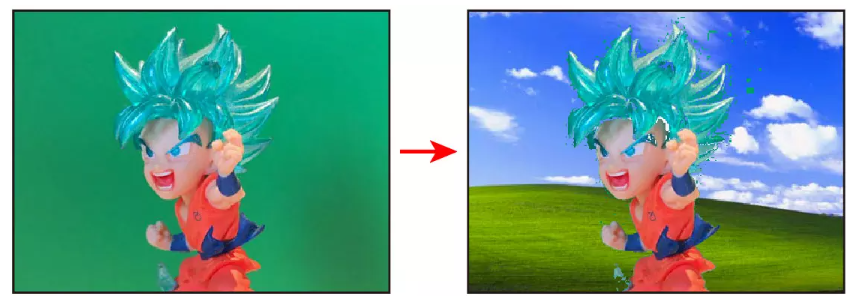

In [ ]:
import cv2
bg = cv2.imread('bg.jpg', cv2.IMREAD_UNCHANGED)     # 開啟背景圖
bg = cv2.cvtColor(bg, cv2.COLOR_BGR2BGRA)           # 轉換成 BGRA

img = cv2.imread('goku.jpg', cv2.IMREAD_UNCHANGED)  # 開啟悟空公仔圖
img = cv2.cvtColor(img, cv2.COLOR_BGR2BGRA)         # 轉換成 BGRA

h = img.shape[0]           # 取得圖片高度
w = img.shape[1]           # 取得圖片寬度

for x in range(w):
    for y in range(h):
        r = img[y, x, 2]   # 取得該像素的紅色值
        g = img[y, x, 1]   # 取得該像素的綠色值
        b = img[y, x, 0]   # 取得該像素的藍色值
        if r>20 and r<80 and g<190 and g>110 and b<150 and b>60:
            img[y, x] = bg[y, x]   # 如果在範圍內的顏色，換成背景圖的像素值

cv2.imwrite('oxxostudio.png', img)
cv2.waitKey(0)
cv2.destroyAllWindows()